In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

file_path = "/Users/alansantana/Documents/Herramients_Computacionales/Facebook_Marketplace_data.csv"
df = pd.read_csv(file_path)

1. Importing of libraries and directing file path

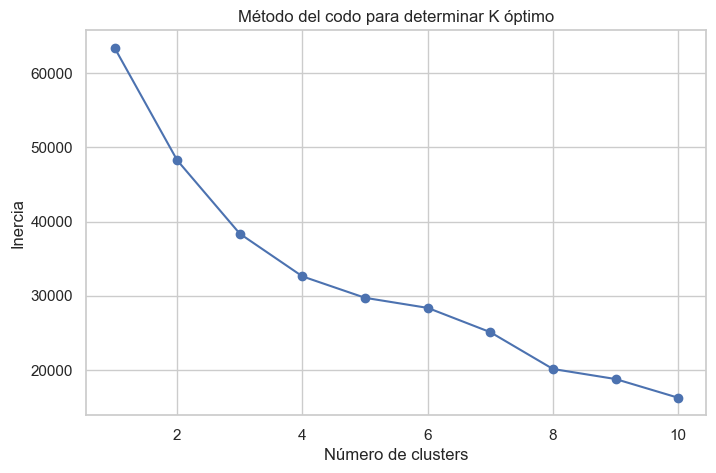

Centros de los clusters:
   num_reactions  num_comments  num_shares    num_likes   num_loves  \
0     111.127579     80.400349   17.811012   103.781339    6.355919   
1     579.518414   2861.226629  409.413598   450.339943  113.739377   
2    1830.249322     61.560976   11.558266  1824.479675    3.094851   
3    1618.000000   1626.846154  812.538462  1146.961538  322.692308   

     num_wows  num_hahas  num_sads  num_angrys  
0    0.534116   0.292447  0.120597    0.040781  
1    4.492918   6.977337  2.566572    1.390935  
2    2.439024   0.197832  0.032520    0.005420  
3  124.538462  20.423077  1.538462    1.846154  


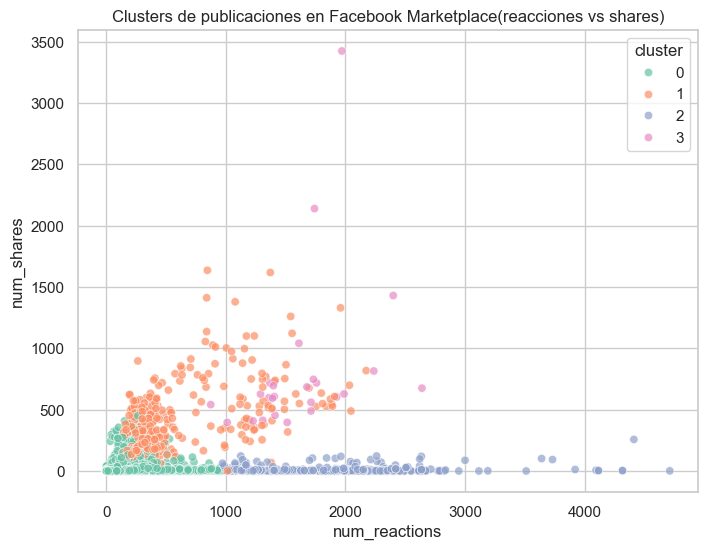

status_type  link  photo  status  video
cluster                                
0              49   4053     296   1902
1               0     23       0    330
2              14    212      69     76
3               0      0       0     26


In [19]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para determinar K óptimo")
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centros de los clusters:")
print(centers)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_reactions',
    y='num_shares',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters de publicaciones en Facebook Marketplace(reacciones vs shares)")
plt.show()

genre_cluster = df.groupby('cluster')['status_type'].value_counts().unstack(fill_value=0)
print(genre_cluster)